In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

In [3]:
os.chdir('D:\\test\project')

In [4]:
df = pd.read_csv('shipping_data_new.csv', sep=',')

In [5]:
df

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume,country,category
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore),0.040560,Singapore,Accessories
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea),0.000198,Korea,Electronics
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China),0.152075,China,Stationery
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China),0.002664,China,Materials
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China),0.623727,China,Garden
...,...,...,...,...,...,...,...,...,...,...,...
263816,Canister,23.58,3.80,0.38,0.37,0.28,2023-03-13,Port of Busan (South Korea),0.039368,Korea,Materials
263817,Plant,15.98,1.20,0.42,0.29,0.34,2023-03-15,Port of Tokyo (Japan),0.041412,Japan,Garden
263818,Pallete of Dog Food,223.05,477.58,1.00,0.92,1.48,2023-03-19,Port of Tokyo (Japan),1.361600,Japan,More food
263819,Coffee Maker,169.09,2.52,0.26,0.20,0.29,2023-03-20,Port of Shanghai (China),0.015080,China,Household Appliances


In [6]:
df.isnull().sum()

name                0
price ($)           0
weight (kg)         0
length (m)          0
width (m)           0
height (m)          0
shipment date       0
destination port    0
volume              0
country             0
category            0
dtype: int64

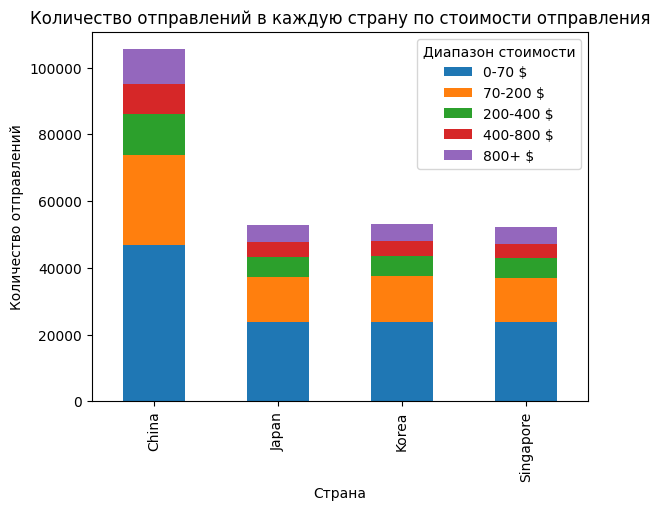

In [48]:
## для начала рассмотрим стоимость отправленных товаров в каждую из стран в разрезе количества отправленных товаров
part1 = ['price ($)', 'weight (kg)']
grouped_data = df.groupby(['country', pd.cut(df['price ($)'], bins=[0,70, 200, 400, 800,  float('inf')])]).size().unstack()
sys = grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Страна')
plt.ylabel('Количество отправлений')
plt.title('Количество отправлений в каждую страну по стоимости отправления')
handles, labels = sys.get_legend_handles_labels()
sys.legend(handles, ['0-70 $', '70-200 $', '200-400 $', '400-800 $', '800+ $'], title='Диапазон стоимости', loc='best')

plt.show()

In [ ]:
## Как мы видим, количетсво отправлений в Китай гораздо выше чем у всех остальных направлений, которые держаться на примерно одинаковом уровне

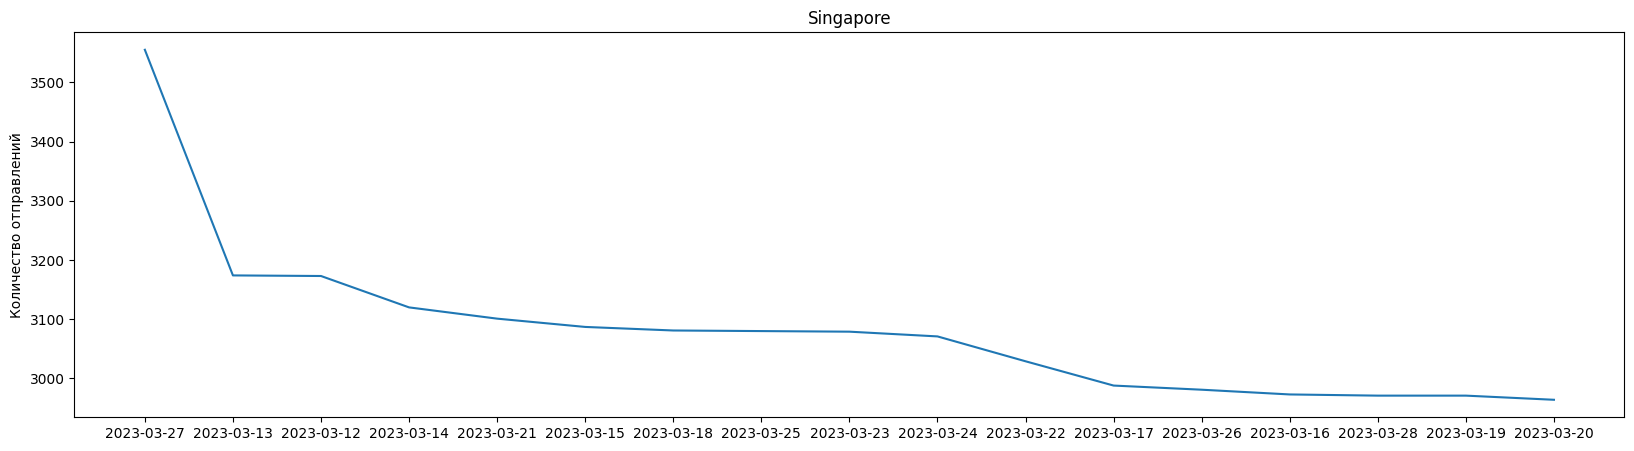

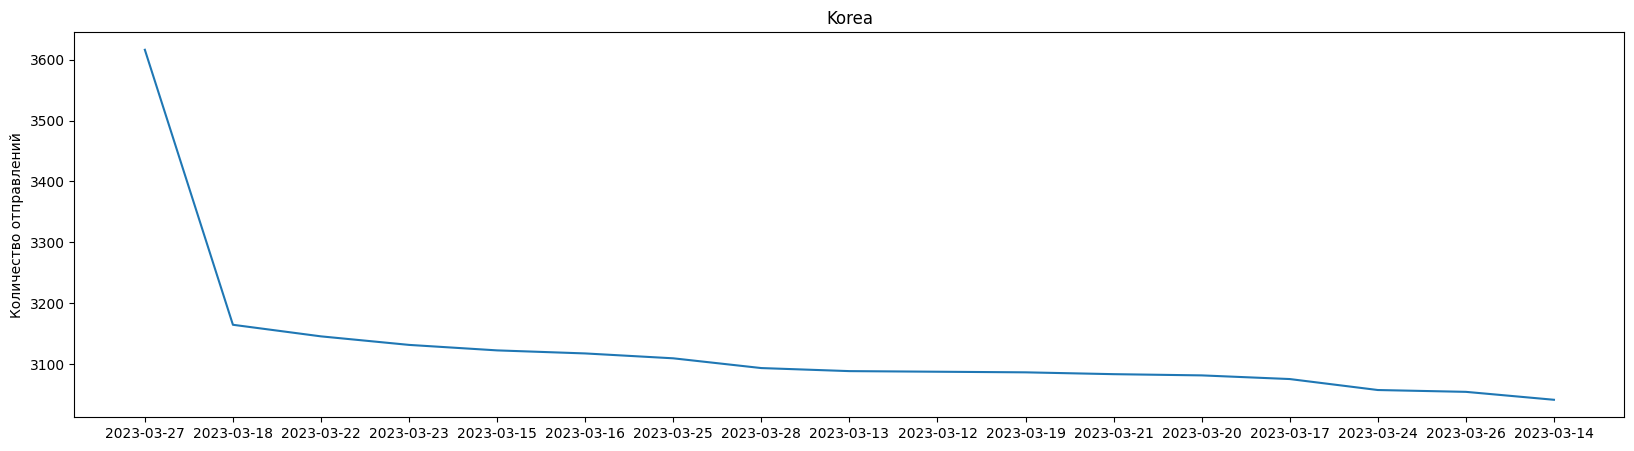

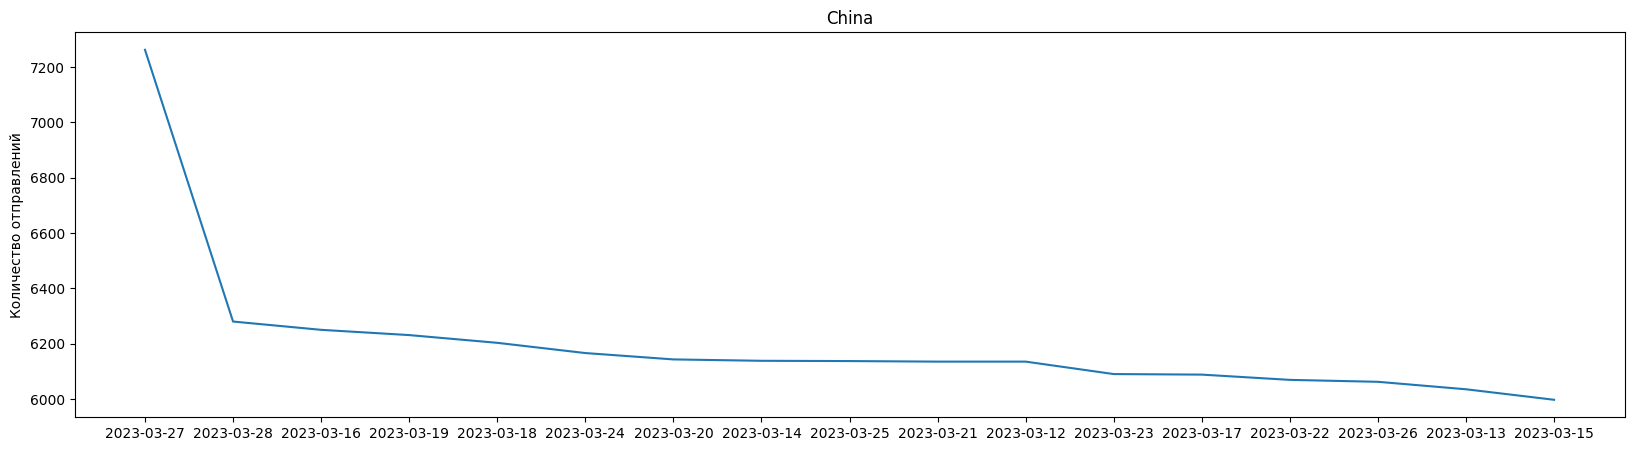

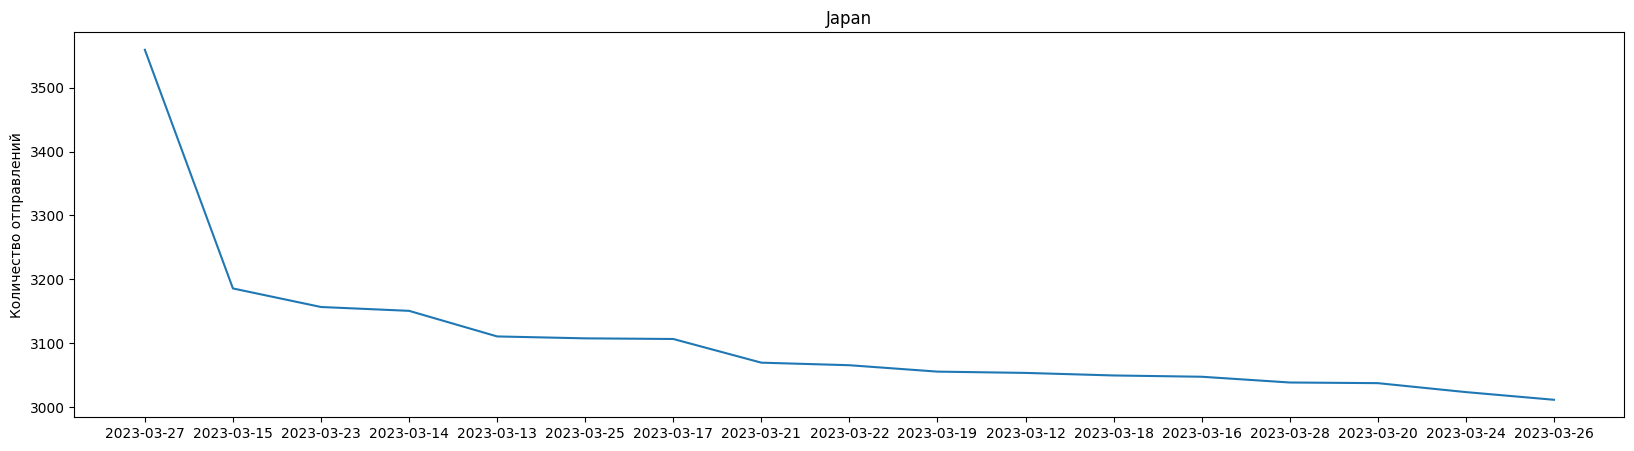

In [17]:
## Визуализируем динамику количества грузов на каждом из направлений по датам
for x in df['country'].unique():
    plt.figure(figsize=(20, 5))
    plt.plot(df.loc[df['country']==x, 'shipment date'].value_counts())

    plt.ylabel('Количество отправлений')
    plt.title(x)
    plt.show()

In [18]:
## А теперь рассмотрим динамику работы порта не по количеству, а по массе отправляемых грузов


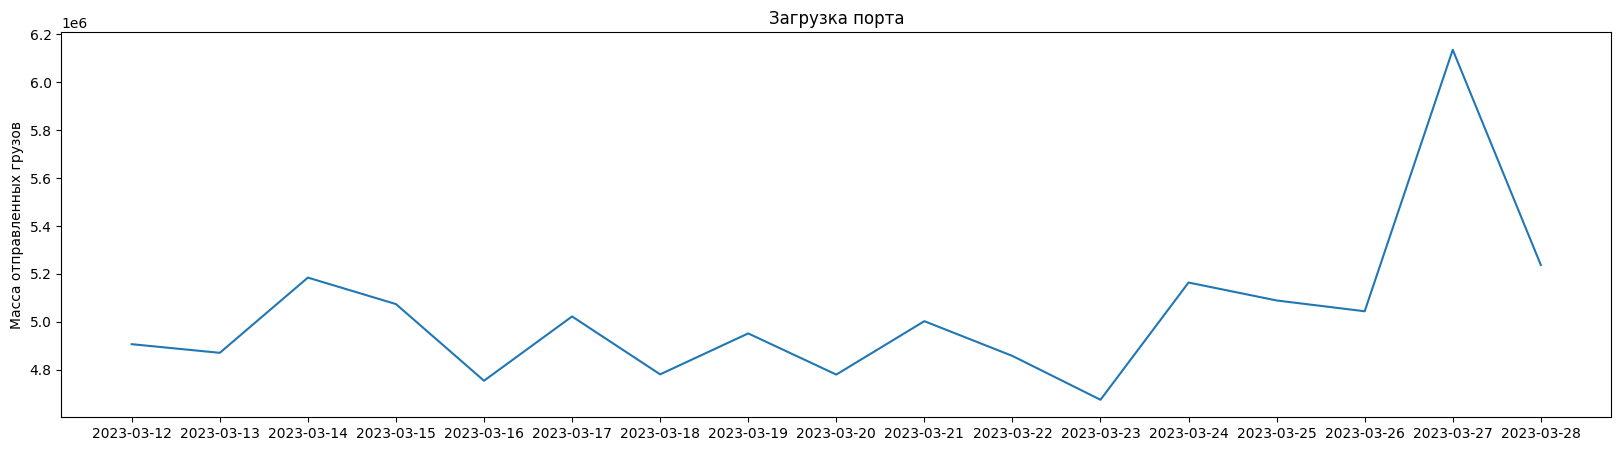

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(df.groupby('shipment date')['weight (kg)'].sum())

plt.ylabel('Масса отправленных грузов')
plt.title('Загрузка порта')
plt.show()

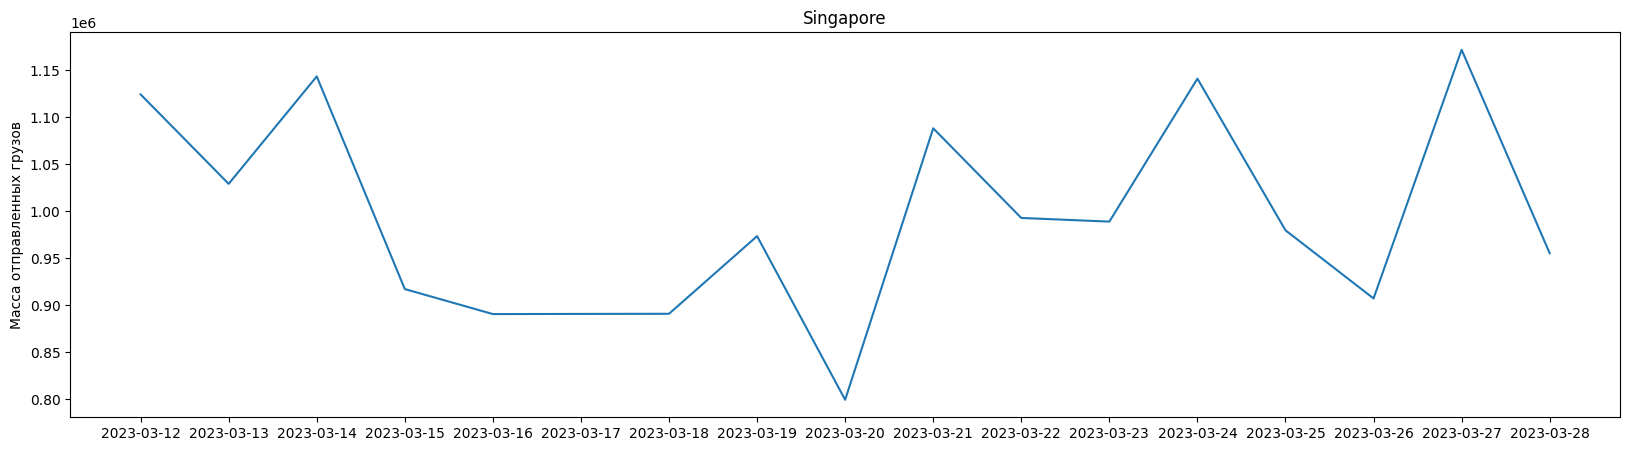

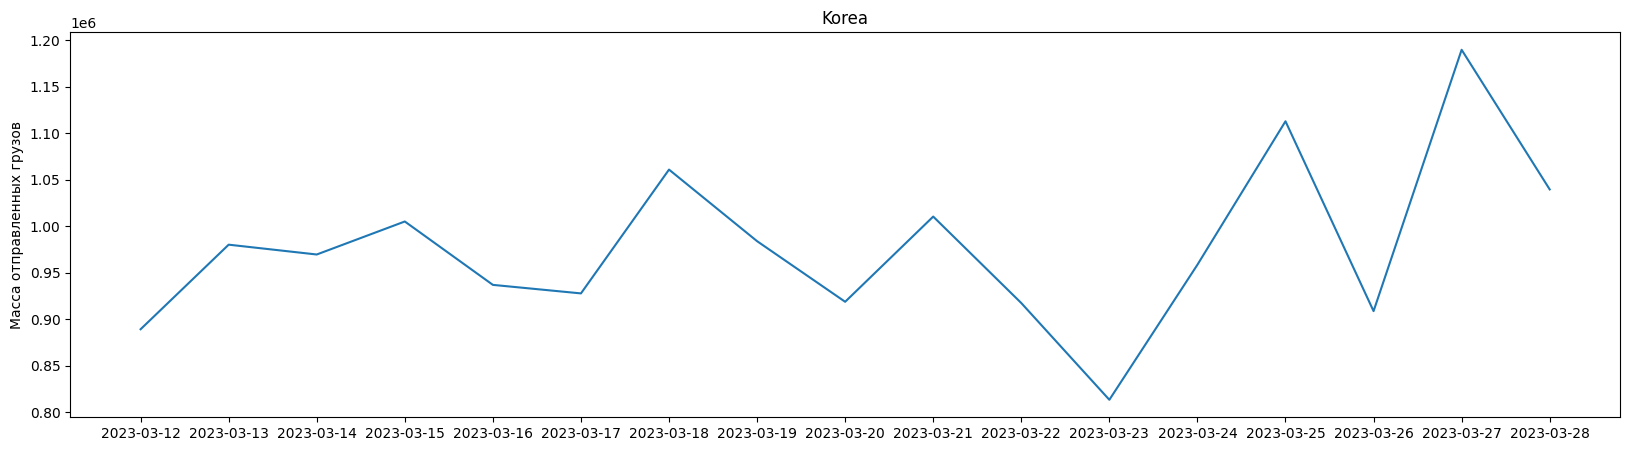

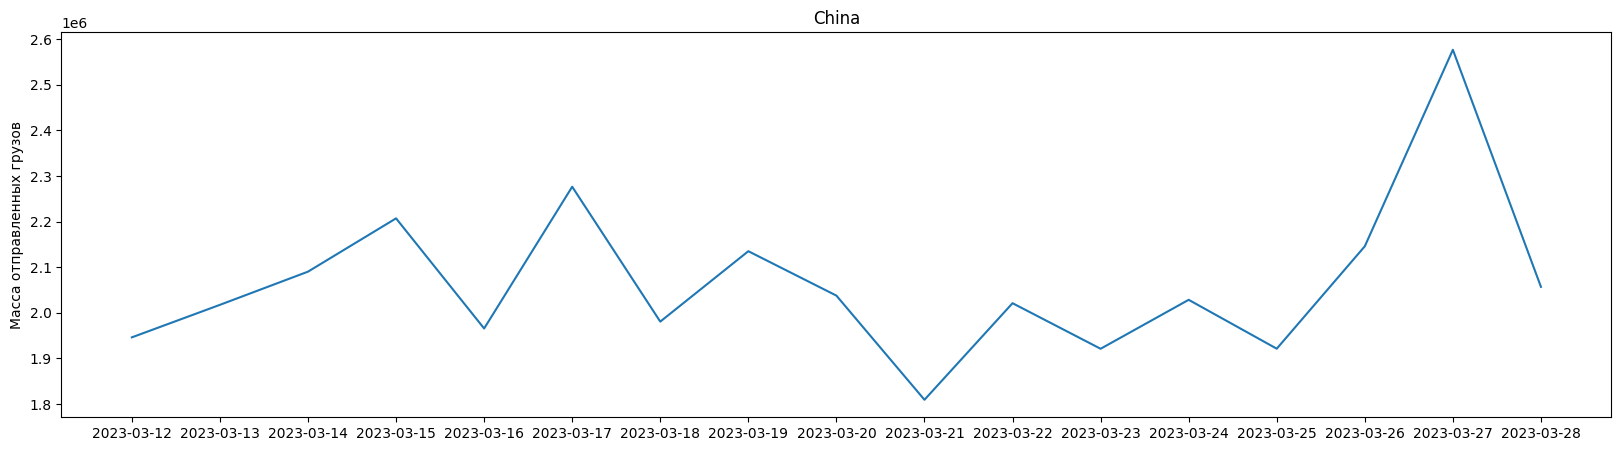

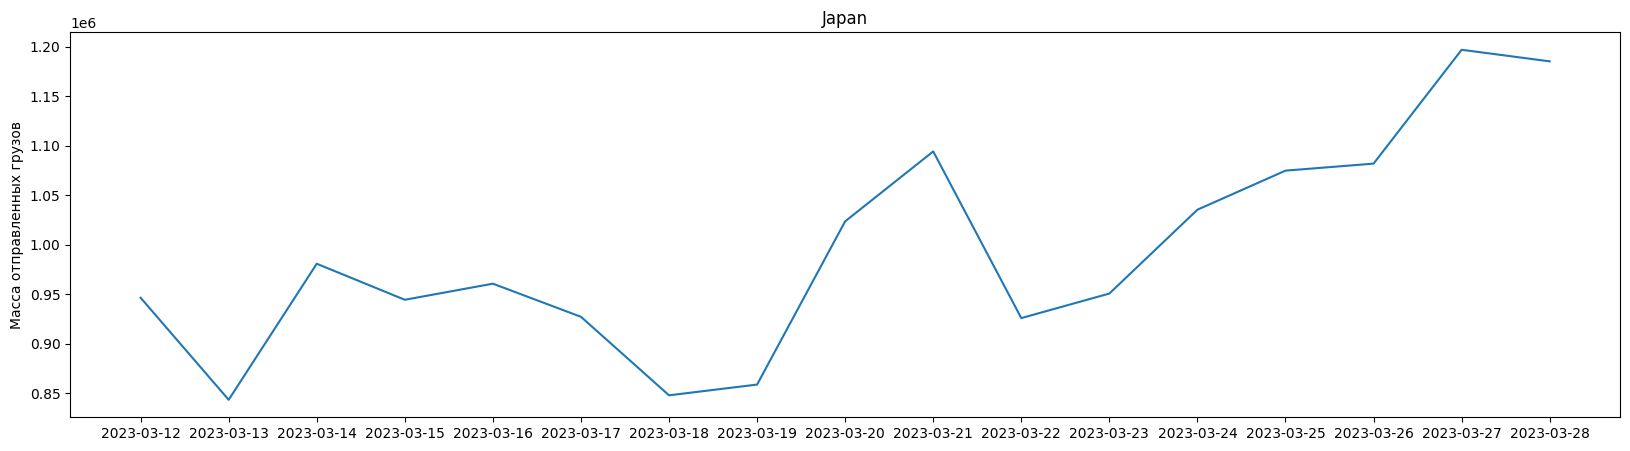

In [20]:
## Приведем визуализации отправлений по массе грузов для каждого из направлений
part2 = ['shipment date', 'weight (kg)']
for x in df['country'].unique():
    plt.figure(figsize=(20, 5))
    plt.plot(df.loc[df['country']==x, part2].groupby('shipment date')['weight (kg)'].sum())
    plt.ylabel('Масса отправленных грузов')
    plt.title(x)
    plt.show()

In [ ]:
## Таким образом, видим, что не смотря на преоблащающее количество отправлений, с точки зрения загрузки порта и судов доминирует 27 марта.

In [72]:
## Просмотрим динамику изменения средней цены отправленных товаров

In [73]:
df2 = df
daily_avg_price = df2['price ($)'].resample('D').mean()

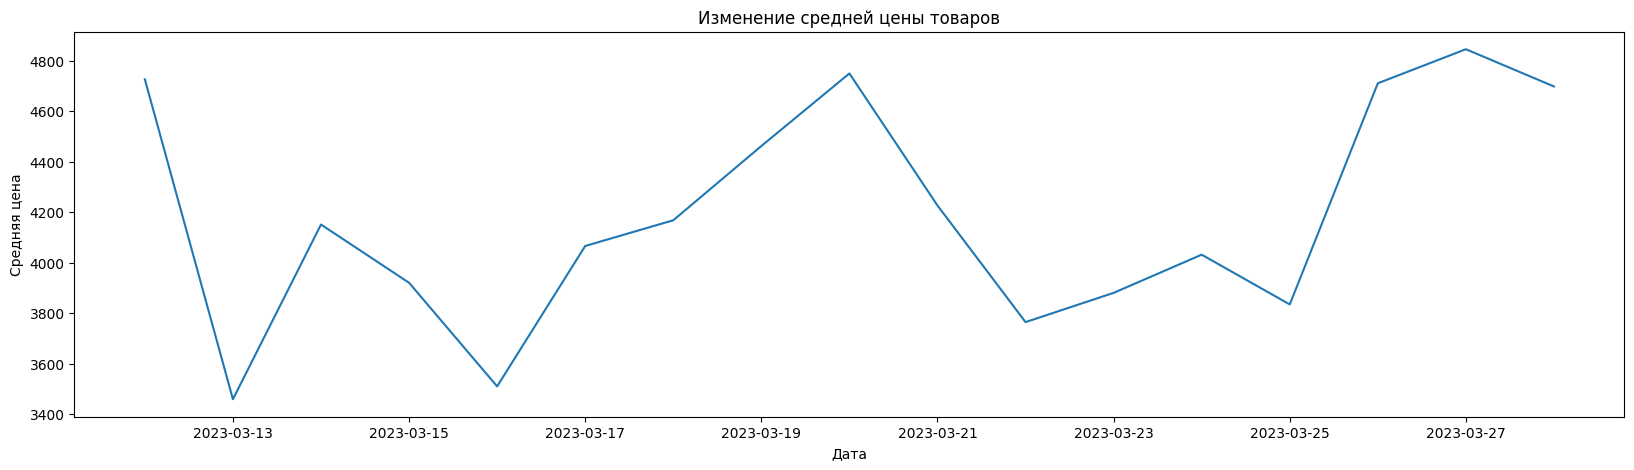

In [75]:
plt.figure(figsize=(20, 5))
plt.plot(daily_avg_price)
plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.title('Изменение средней цены товаров')
plt.show()
